<IPython.core.display.Javascript object>


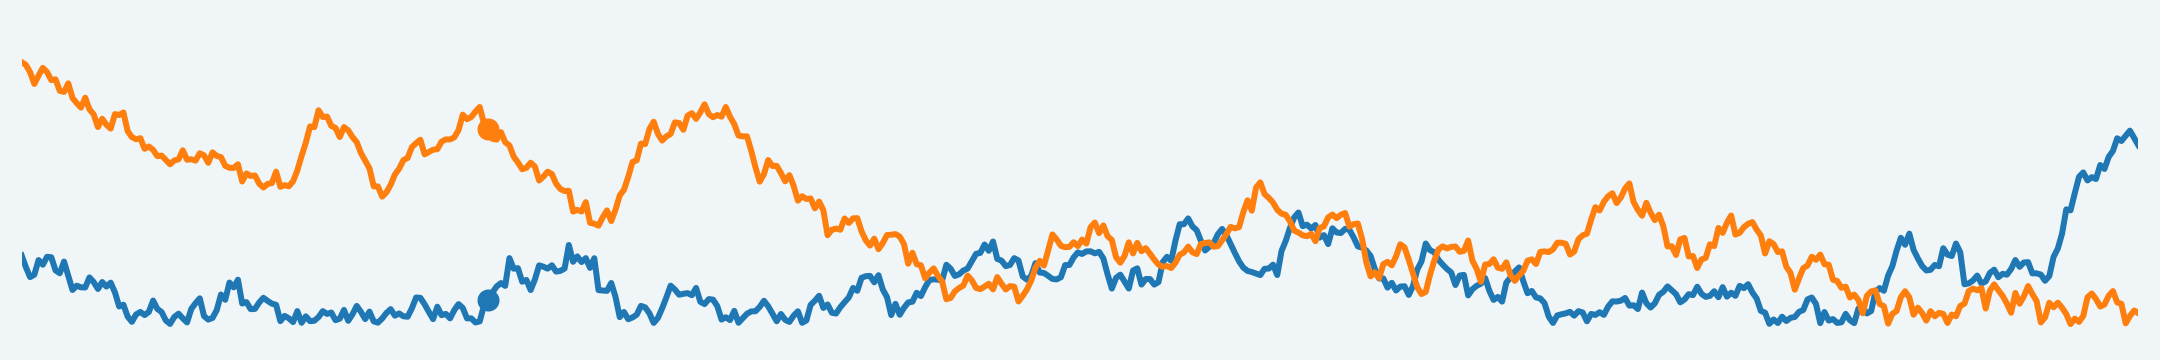

MovieWriter ffmpeg unavailable; using Pillow instead.


In [45]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(15,2.5), facecolor=(240/255,246/255, 248/255))
ax = plt.axes(xlim=(0, 10))
t = torch.linspace(0,10,500)

line1, = plt.plot(t,y[:500,:,0].squeeze().detach(), color="C0", lw=3)
line2, = plt.plot(t,y[:500,:,1].squeeze().detach(), color="C1", lw=3)
point1, = plt.plot([0], [y[0, 0,0]], "o", color="C0", markersize=10)
point2, = plt.plot([0], [y[0, 0,1]], "o", color="C1", markersize=10)
plt.axis("off")


# animation function.  This is called sequentially
def animate(i):
    if i > 499:
        i = 1000 - i - 1
    global line1, line2
    line1.set_data(t,y[i*3:i*3+500,:,0].squeeze().detach())
    line2.set_data(t,y[i*3:i*3+500,:, 1].squeeze().detach())
    point1.set_data(t[i], y[i*3 + i,0, 0])
    point2.set_data(t[i], y[i*3 + i,0, 1])
    return line1, line2

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=999, interval=1, repeat=True)
plt.tight_layout()
# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.gif', fps=24)
plt.show()

In [5]:
from torchsde import sdeint
import torch 
import matplotlib.pyplot as plt

In [2]:
class SDE(torch.nn.Module):
    noise_type = 'general'
    sde_type = 'ito'

    def __init__(self):
        super().__init__()
        self.alpha = 1.
        self.beta =  0.2
        self.gamma = 0.6
        self.delta = 0.2

    # Drift
    def f(self, t, xy):
        x = xy[...,0].reshape(-1,1)
        mask = x <= 0
        x[mask]=0
        y = xy[...,1].reshape(-1,1)
        mask = y <= 0
        y[mask] = 0
        x_new =  self.alpha*x - self.beta *x*y
        y_new = self.delta*x*y - self.gamma*y
        return torch.hstack([x_new,y_new])

    # Diffusion
    def g(self, t, xy):
        return torch.eye(2).repeat(xy.shape[0],1,1)*3

In [3]:
t = torch.linspace(0,60, 2000)
sde = SDE()

y = sdeint(sde, torch.tensor([[6.,4.]]).repeat(1,1) + torch.randn(1,2)*0.5, t)

In [22]:
y.shape

torch.Size([2000, 1, 2])

(-1.0603118021041156, 20.066203594580294)

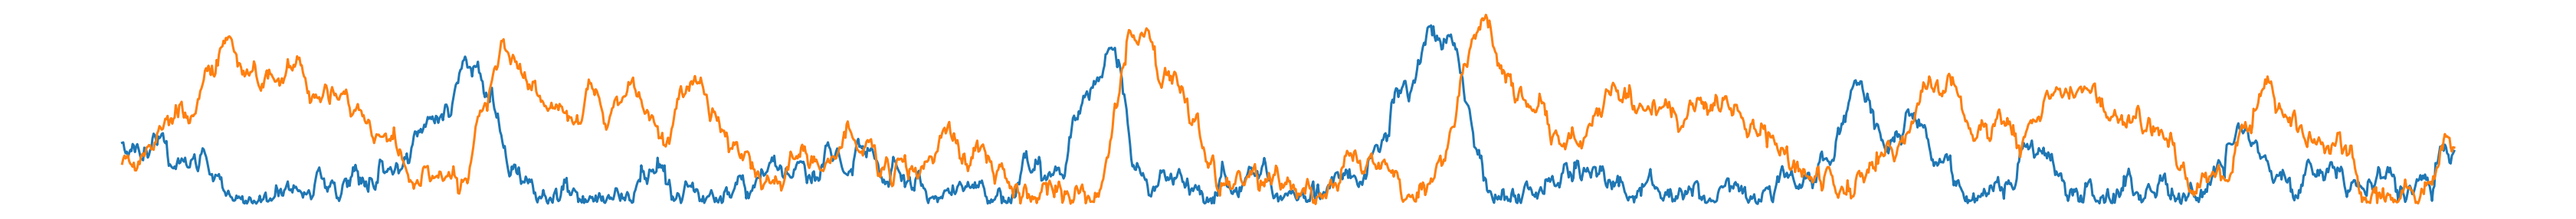

In [6]:
%matplotlib inline
plt.figure(figsize=(60,5))
plt.plot(t,y[...,0].squeeze().detach(), color="C0", lw=3)
plt.plot(t,y[...,1].squeeze().detach(), color="C1", lw=3)
plt.axis("off")
plt.ylim()